# 🎹 **MUSIC GENRE PREDICTION**

<font color = "purple">(предсказание музыкального жанра)</font>

**ОПИСАНИЕ ЗАДАЧИ**:

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса. Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

В ходе работы пройдите все основные этапы полноценного исследования:

    *  загрузка и ознакомление с данными
    *  предварительная обработка
    *  полноценный разведочный анализ
    *  разработка новых синтетических признаков
    *  проверка на мультиколлинеарность
    *  отбор финального набора обучающих признаков
    *  выбор и обучение моделей
    *  итоговая оценка качества предсказания лучшей модели
    *  анализ важности ее признаков

**ВАЖНО**:

необходимо реализовать решение с использованием технологии `pipeline` (из библиотеки `sklearn`)

**ОЖИДАЕМЫЙ РЕЗУЛЬТАТ**:
* Оформленный репозиторий на GitHub (ноутбук с исследованием + код приложения)
* Развернутое web-приложение (с использованием библиотеки Streamlit)

# **ПРОЕКТ**

## ВВЕДЕНИЕ

### 🛠 1. Команда

*   Шаталова Анна
*   Скрябин Евгений
*   Дёмин Евгений

### 🛠 2. Ссылки



*   [Репозиторий](https://github.com/Anna-Shatalova/Rock-n-Code)
*   [Приложение](https://rock-n-code.streamlit.app/)
*   [GOOGLE-таблица](https://docs.google.com/spreadsheets/d/1ADruKM3xqiGz9kYRJbSLSIk_ZH0BVU0557UB28Apr7w/edit#gid=0)

### 🛠 3. Описание датасета

<font color = 'purple'>`instance_id`</font> - уникальный идентификатор трека

<font color = 'purple'>`track_name`</font> - название трека

<font color = 'purple'>`acousticness`</font> - акустичность

<font color = 'purple'>`danceability`</font> - танцевальность

<font color = 'purple'>`duration_ms`</font> -продолжительность в милисекундах

<font color = 'purple'>`energy`</font> - энергичность

<font color = 'purple'>`instrumentalness`</font> - инструментальность

<font color = 'purple'>`key`</font> - тональность

<font color = 'purple'>`liveness`</font> - привлекательность

<font color = 'purple'>`loudness`</font> - громкость

<font color = 'purple'>`mode`</font> - наклонение

<font color = 'purple'>`speechiness`</font> - выразительность

<font color = 'purple'>`tempo`</font> - темп

<font color = 'purple'>`obtained_date`</font> - дата загрузки в сервис

<font color = 'purple'>`valence`</font> - привлекательность произведения для пользователей сервиса

<font color = 'purple'>`music_genre`</font> - музыкальный жанр

## ЧАСТЬ I: Загрузка и обработка данных

### 🛠 1. Импорт библиотек

ОБЩИЕ

In [1]:
import pandas as pd
import numpy as np
import random
from numpy.random import rand, randn

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

from tqdm.auto import trange

ДЛЯ ТЕКСТА

In [2]:
!pip install nltk -q

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)

from string import punctuation
from collections import Counter

import re

ДЛЯ МАШИННОГО ОБУЧЕНИЯ

In [4]:
%%capture
!pip install catboost -q

In [5]:
import gc

import catboost as cb
from catboost import CatBoostClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### 🛠 2. Загрузка данных

In [6]:
train = "https://www.dropbox.com/scl/fi/5zy935lqpaqr9lat76ung/music_genre_train.csv?rlkey=ccovu9ml8pfi9whk1ba26zdda&dl=1"
test = "https://www.dropbox.com/scl/fi/o6mvsowpp9r3k2lejuegt/music_genre_test.csv?rlkey=ac14ydue0rzlh880jwj3ebum4&dl=1"

In [7]:
train = pd.read_csv(train)
test = pd.read_csv(test)

### 🛠 3. Обзор данных

#### 3.1. анализ

In [8]:
# посмотрим на данные

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [9]:
train.sample(5).T

,15152,3463,594,18063,16300
instance_id,61526.0,21227.0,23340.0,41228.0,52534.0
track_name,New York Minute,Speakerbox (feat. Lafa Taylor),Slam,Headstrong,Hurt Me
acousticness,0.334,0.00943,0.00003,0.000172,0.128
danceability,0.551,0.507,0.428,0.492,0.62
duration_ms,-1.0,282273.0,344973.0,285570.0,122285.0
energy,0.289,0.934,0.982,0.896,0.451
instrumentalness,0.0,0.0018,0.822,0.000003,0.0
key,G#,G#,A#,E,F#
liveness,0.0379,0.222,0.322,0.189,0.373
loudness,-12.214,-2.325,-4.104,-5.819,-7.623


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,20394.0,55973.846916,20695.792545,20011.00000,38157.25000,56030.000000,73912.750000,91758.000
acousticness,20394.0,0.274783,0.321643,0.00000,0.01520,0.120000,0.470000,0.996
danceability,20394.0,0.561983,0.171898,0.06000,0.45100,0.570000,0.683000,0.978
duration_ms,20394.0,220375.425272,126728.326142,-1.00000,177517.00000,219533.000000,266000.000000,4497994.000
energy,20394.0,0.625276,0.251238,0.00101,0.47000,0.666000,0.830000,0.999
instrumentalness,20394.0,0.159989,0.306503,0.00000,0.00000,0.000144,0.084475,0.996
liveness,20394.0,0.198540,0.166742,0.01360,0.09730,0.130000,0.253000,1.000
loudness,20394.0,-8.552998,5.499917,-44.40600,-10.25575,-7.052000,-5.054000,3.744
speechiness,20394.0,0.091352,0.097735,0.02230,0.03560,0.049050,0.095575,0.942
tempo,19952.0,120.942522,30.427590,34.76500,95.92175,120.012500,141.966250,220.041


In [11]:
# создадим функцию для поиска уникальных значений в столбцах с данными типа 'object'

def my_unique_values(data):

  res = []

  for column in data.columns:
    if data[column].dtype == 'object':
      res.append(f'{column} - {len(data[column].unique())} - {data[column].unique()}')

  return res

In [12]:
# найдём уникальные значения уникальных значений в столбцах с данными типа 'object'

my_unique_values(train)

["track_name - 18643 - ['Highwayman' 'Toes Across The Floor' 'First Person on Earth' ...\n 'Original Prankster' '4Peat' 'Trouble (feat. MC Spyder)']",
 "key - 13 - ['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']",
 "mode - 3 - ['Major' 'Minor' nan]",
 "obtained_date - 4 - ['4-Apr' '3-Apr' '5-Apr' '1-Apr']",
 "music_genre - 10 - ['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'\n 'Anime' 'Rap' 'Classical']"]

In [13]:
# найдём уникальные значение в столбце `instance_id`

train['instance_id'].nunique()

20394

In [14]:
# наёдем количество треков с отрицательным значением в столбце `duration_ms`

train.query('duration_ms < 0')['duration_ms'].value_counts()

duration_ms
-1.0    2009
Name: count, dtype: int64

In [15]:
# наёдем количество треков с отрицательным значением в столбце `loudness`

train.query('loudness < 0')['loudness'].value_counts()

loudness
-5.013     11
-5.016     11
-4.159     10
-5.202     10
-6.600      9
           ..
-7.728      1
-24.838     1
-24.110     1
-11.847     1
-1.615      1
Name: count, Length: 10826, dtype: int64

#### 3.2. вывод
* названия столбцов не требуют корректировки;
* в столбцах `key`, `mode` и `tempo` есть пропуски;
* типы данных не требуют корректировки;

* данные столбцов `obtained_date` ограничены 1, 3, 4, 5 апреля, они не носят смыслового значения, а потому этот столбец может быть удален;
* столбец `instance_id` можно удалить, так как его значения не носят смыслового значения;
* данные столбца `duration_ms` имеют отрицательные значения (около 2 009 из 20 394), столбец можно удалить, так как его значения не носят смыслового значения, но мы пока его оставим, попробуем позже из него сформировать новый признак;

* данные столбца `loudness` имеют отрицательные значения, отрицательных значений 10 826 из 20 394, столбец необходимо оставить, так как отрицательное значение возможно;
* данные столбца `key` содержат значения с символом '#', этот символ не является мусорм, этот символ обозначает "диез", то есть повышение ноты на 1/2 тона;
* данные столбца `track name` необходимо привести к нижнему регистру;
* данные столбцов `key`, `mode`, `music_genre` приводить к нижнему регистру нет необходимости, так как видно, что данные этих колонок немногочислены и написание их одинаковое.

### 🛠 4. Пропуски

#### 4.1. анализ

In [16]:
# посчитаем процент пропусков в столбцах

(train.isna().mean().sort_values(ascending=False) * 100).round(2)

key                 3.60
mode                2.48
tempo               2.17
instance_id         0.00
track_name          0.00
acousticness        0.00
danceability        0.00
duration_ms         0.00
energy              0.00
instrumentalness    0.00
liveness            0.00
loudness            0.00
speechiness         0.00
obtained_date       0.00
valence             0.00
music_genre         0.00
dtype: float64

заполним пропуски в столбце `key`

In [17]:
# сгруппируем данные и посмотрим на показатели

train.groupby('music_genre')['key'].agg(['count', pd.Series.mode])

,count,mode
music_genre,,
Alternative,2511,G
Anime,1834,G
Blues,2754,G
Classical,1333,D
Country,2044,G
Electronic,2473,C#
Hip-Hop,1099,C#
Jazz,1197,F
Rap,2328,C#


In [18]:
# заполним пропуски

train['key'] = train.groupby('music_genre')['key'].transform(lambda x: x.fillna(x.mode()[0]))

заполним пропуски в столбце `mode`

In [19]:
# сгруппируем данные и посмотрим на показатели

train.groupby('music_genre')['mode'].agg(['count', pd.Series.mode])

,count,mode
music_genre,,
Alternative,2535,Major
Anime,1850,Major
Blues,2790,Major
Classical,1339,Major
Country,2067,Major
Electronic,2500,Major
Hip-Hop,1128,Major
Jazz,1216,Major
Rap,2358,Major


In [20]:
# заполним пропуски

train['mode'] = train.groupby('music_genre')['mode'].transform(lambda x: x.fillna(x.mode()[0]))

заполним пропуски в столбце `tempo`

In [21]:
# сгруппируем данные и посмотрим на показатели

train.groupby('music_genre')['tempo'].agg(['count', 'median'])

,count,median
music_genre,,
Alternative,2543,120.0480
Anime,1863,128.0020
Blues,2796,119.1180
Classical,1340,95.5235
Country,2069,121.9700
Electronic,2515,126.0000
Hip-Hop,1116,120.1000
Jazz,1222,105.3485
Rap,2377,120.0200


In [22]:
# заполним пропуски

train['tempo'] = train.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.median()))

In [23]:
# еще раз посчитаем процент пропусков в столбцах

(train.isna().mean().sort_values(ascending=False) * 100).round(2)

instance_id         0.0
track_name          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
obtained_date       0.0
valence             0.0
music_genre         0.0
dtype: float64

#### 4.2. вывод
В столбцах `key`, `mode` и `tempo` были пропуски (3.6 %, 2.48 %, 2.17 % соответственно), для обучения модели заполнили модой / медианным значением.

### 🛠 5. Дубликаты

#### 5.1. анализ

Проверим наличие явных дубликатов

In [24]:
train.duplicated().sum()

0

Проверим наличие неявных дубликатов

In [25]:
# приведем название песен к нижнему регистру

train["track_name"].str.lower()

0                        highwayman
1             toes across the floor
2             first person on earth
3        no te veo - digital single
4                   chasing shadows
                    ...            
20389                        o pato
20390                mt. washington
20391            original prankster
20392                         4peat
20393     trouble (feat. mc spyder)
Name: track_name, Length: 20394, dtype: object

In [26]:
# проверим наличие дубликатов в столбце

train['track_name'].duplicated().sum()

1751

Дубликатов много, но их нельзя удалять, так названия песен могу повторяться.
Проверим дубликаты по группе признаков.

In [27]:
# найдём дубликаты

train.loc[train.duplicated(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])].shape

(675, 16)

In [28]:
duplicate_rows = train[train.duplicated(subset=['instrumentalness', 'acousticness', 'danceability', 'duration_ms', 'energy', 'liveness', 'tempo', 'mode', 'key', 'speechiness', 'loudness', 'valence'], keep=False)]
duplicate_rows_sorted = duplicate_rows.sort_values('liveness')
print("Строки с дубликатами по параметрам:")
duplicate_rows_sorted.head(4)

Строки с дубликатами по параметрам:


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
18460,27009.0,In The Morning,0.0316,0.791,212869.0,0.916,0.000006,E,0.0318,-4.364,Minor,0.0676,100.003,4-Apr,0.537,Hip-Hop
849,78050.0,In The Morning,0.0316,0.791,212869.0,0.916,0.000006,E,0.0318,-4.364,Minor,0.0676,100.003,4-Apr,0.537,Alternative
11553,68297.0,I Won't Let You Down,0.0257,0.755,222440.0,0.915,0.000000,D,0.0351,-3.505,Major,0.1050,113.986,4-Apr,0.700,Alternative
4879,66023.0,I Won't Let You Down,0.0257,0.755,222440.0,0.915,0.000000,D,0.0351,-3.505,Major,0.1050,113.986,4-Apr,0.700,Rock


In [29]:
# удалим найденные дубликаты

train = train.loc[~train.duplicated(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])]

#### 5.2. вывод
* явных дубликатов в датафрейме нет;
* в датафрейме выялены неявные дубликты (с указанием различного вида жанров) по совокупности признаков (уникальных), дубликаты удалены, т.к. будут только путать при определении жанра.

### 🛠 6. Удаление столбцов

#### 6.1. анализ

Удалим из датасета столбцы `instance_id`, `obtained_date`, значения которых не несут смыслового значения

In [30]:
train.drop('obtained_date', axis = 1, inplace = True)

In [31]:
train.drop('instance_id', axis = 1, inplace = True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19719 entries, 0 to 20393
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        19719 non-null  object 
 1   acousticness      19719 non-null  float64
 2   danceability      19719 non-null  float64
 3   duration_ms       19719 non-null  float64
 4   energy            19719 non-null  float64
 5   instrumentalness  19719 non-null  float64
 6   key               19719 non-null  object 
 7   liveness          19719 non-null  float64
 8   loudness          19719 non-null  float64
 9   mode              19719 non-null  object 
 10  speechiness       19719 non-null  float64
 11  tempo             19719 non-null  float64
 12  valence           19719 non-null  float64
 13  music_genre       19719 non-null  object 
dtypes: float64(10), object(4)
memory usage: 2.3+ MB


#### 6.2. вывод

Удалены из датасета столбцы `instance_id`, `obtained_date`, значения которых не несли смыслового значения.

### 🛠 7. Добавление столбцов

In [33]:
# добавим столбец с длительностью трека в минутах

#train['duration_min'] = train['duration_ms'] / 1000 / 60

train['duration_ms'] = train['duration_ms'] / 1000 / 60
train = train.rename(columns={'duration_ms': 'duration_min'})

### 🚩 ВЫВОДЫ

* названия столбцов не требуют корректировки;
* типы данных не требуют корректировки;
* явных дубликатов в датафрейме нет;
* в датафрейме выялены неявные дубликты по совокупности признаков (уникальных), дубликаты удалены;

* В столбцах `key`, `mode` и `tempo` были пропуски (3.6 %, 2.48 %, 2.17 % соответственно), для обучения модели заполнили модой / медианным значением;

* данные столбцов `obtained_date` ограничены 1, 3, 4, 5 апреля, они не носят смыслового значения, а потому этот столбец может быть удален, столбец удалён;
* столбец `instance_id` можно удалить, так как его значения не носят смыслового значения, столбец удалён;
* данные столбца `duration_ms` имеют отрицательные значения (около 2 009 из 20 394), столбец можно удалить, так как его значения не носят смыслового значения, но мы пока его оставим, попробуем позже из него сформировать новый признак;

* данные столбца `loudness` имеют отрицательные значения, отрицательных значений 10 826 из 20 394, столбец необходимо оставить, так как отрицательное значение возможно;
* данные столбца `key` содержат значения с символом '#', этот символ не является мусорм, этот символ обозначает "диез", то есть повышение ноты на 1/2 тона;
* данные столбца `track name` необходимо привести к нижнему регистру;
* данные столбцов `key`, `mode`, `music_genre` приводить к нижнему регистру нет необходимости, так как видно, что данные этих колонок немногочислены и написание их одинаковое.

## ЧАСТЬ II: Работа с признаками

### 🛠 1. Числовые признаки

#### 1.1. анализ

In [ ]:
# найдём диапазон значений в столбцах

train.describe().loc[['min', 'max']].T

,min,max
acousticness,0.000000,0.996000
danceability,0.060000,0.978000
duration_min,-0.000017,74.966567
energy,0.001010,0.999000
instrumentalness,0.000000,0.996000
liveness,0.013600,1.000000
loudness,-44.406000,3.744000
speechiness,0.022300,0.942000
tempo,34.765000,220.041000
valence,0.000000,0.992000


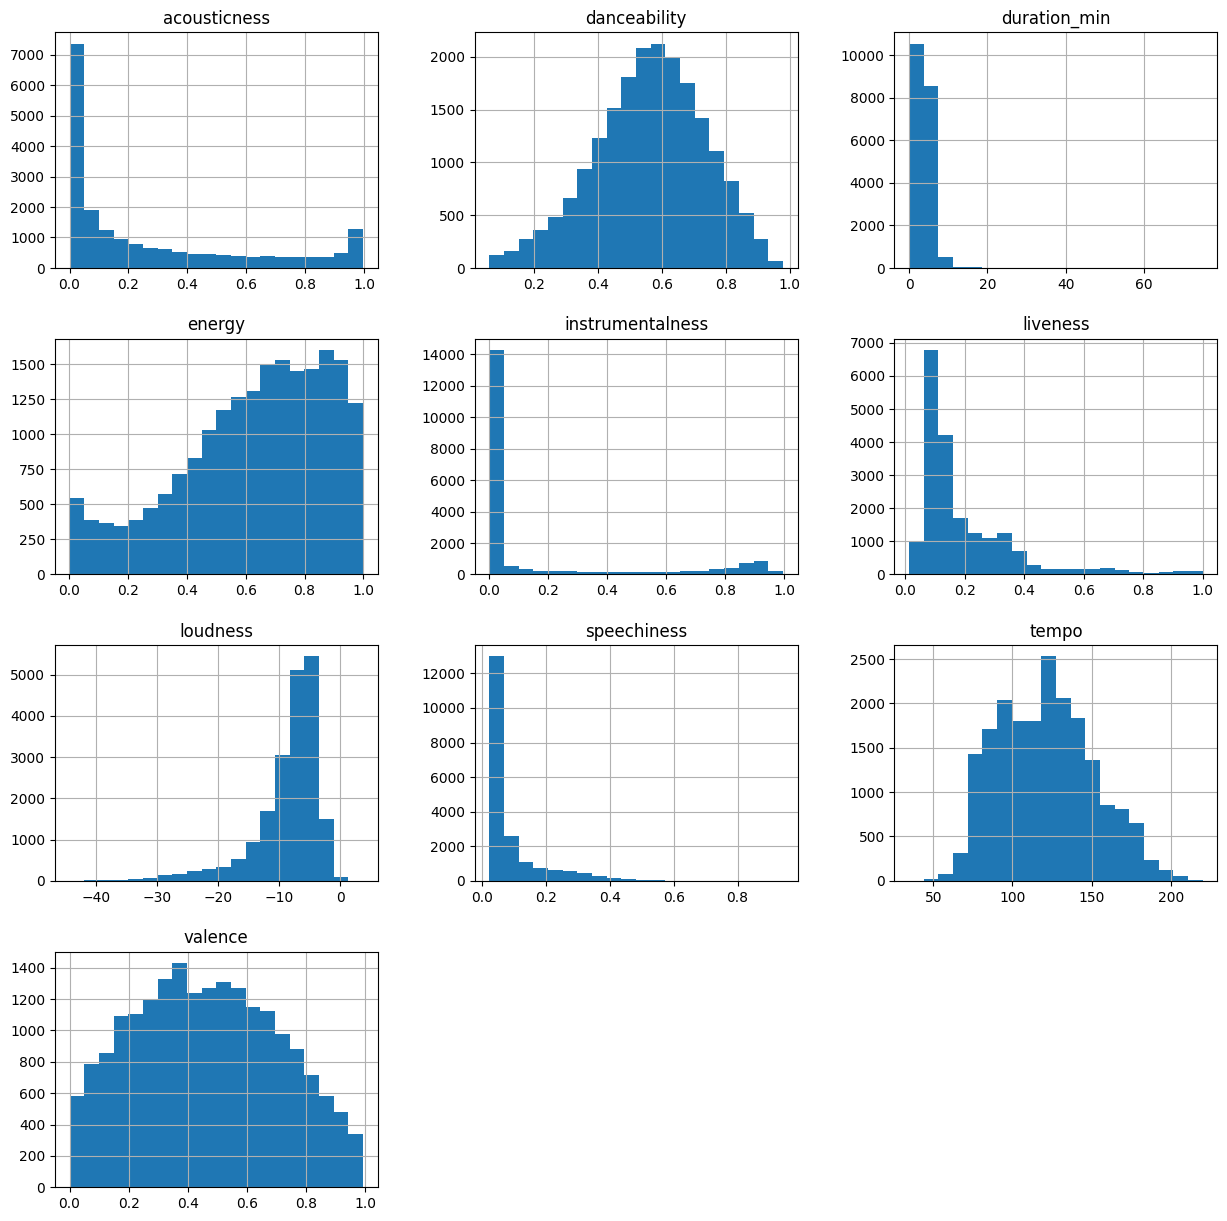

In [ ]:
train.hist(figsize=(15, 15), bins=20);

##### 1.1.1. acousticness
       
     

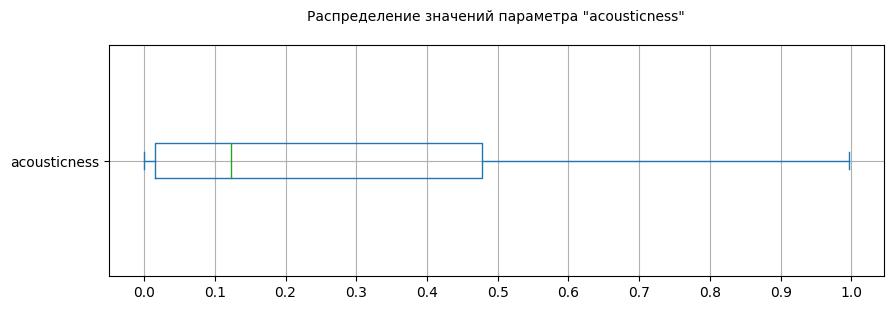

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='acousticness',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_xticks(np.arange(0, 1.1, 0.1))

ax.set_title('Распределение значений параметра "acousticness"' + "\n", fontsize=10)

plt.show()

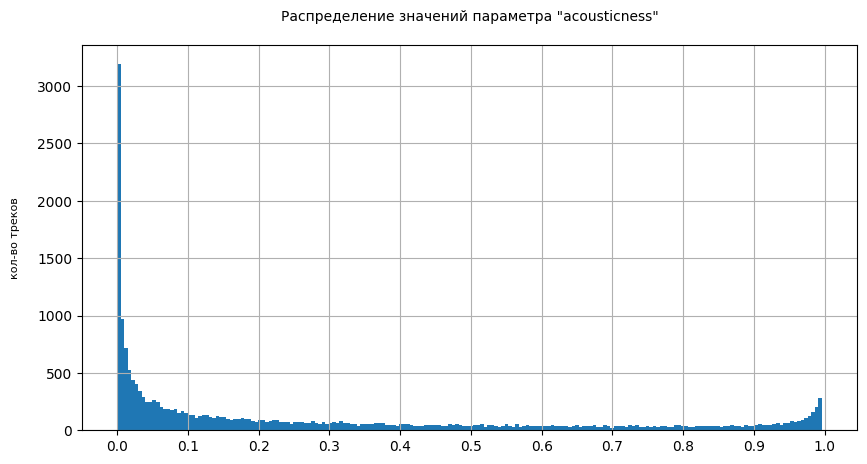

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='acousticness',
    bins=200,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "acousticness"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.2. danceability
     

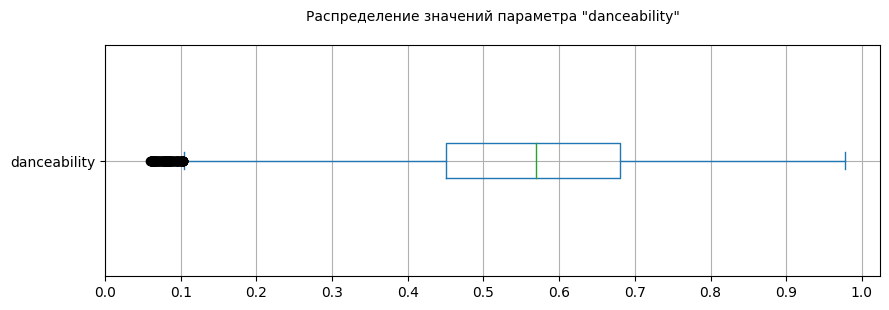

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='danceability',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_xticks(np.arange(0, 1.1, 0.1))

ax.set_title('Распределение значений параметра "danceability"' + "\n", fontsize=10)

plt.show()

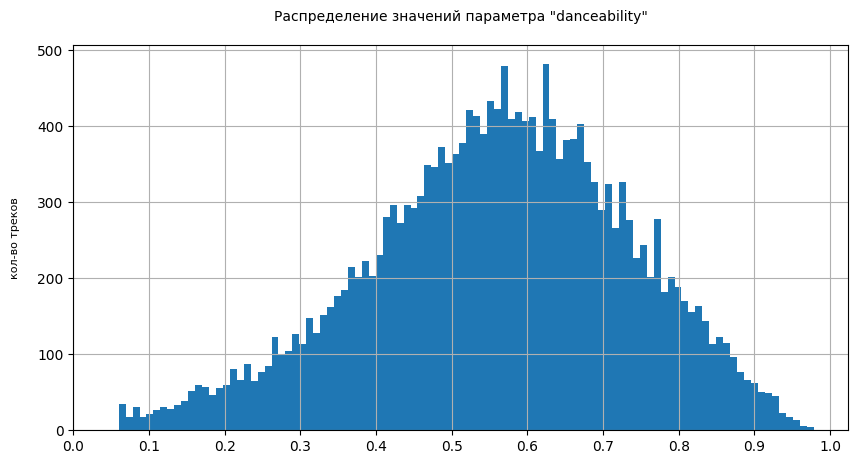

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='danceability',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "danceability"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.3. energy

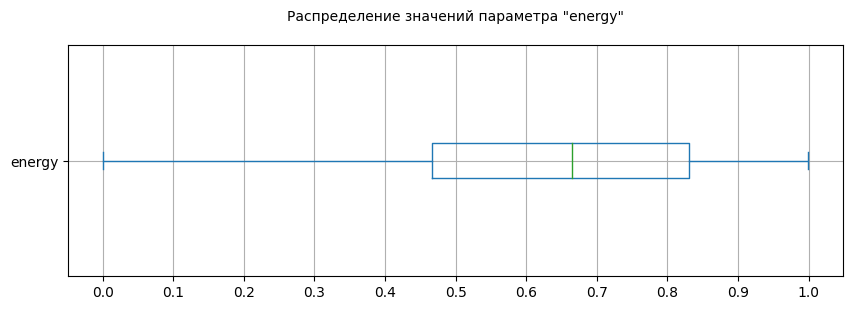

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='energy',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_xticks(np.arange(0, 1.1, 0.1))

ax.set_title('Распределение значений параметра "energy"' + "\n", fontsize=10)

plt.show()

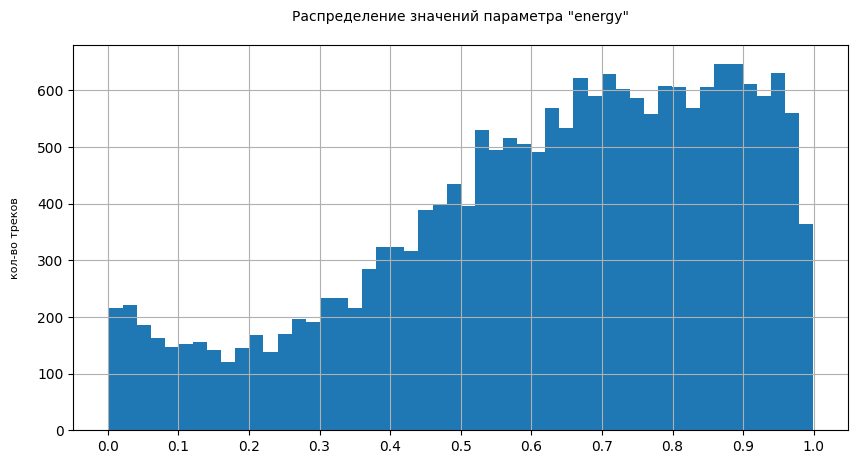

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='energy',
    bins=50,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "energy"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.4. instrumentalness
     

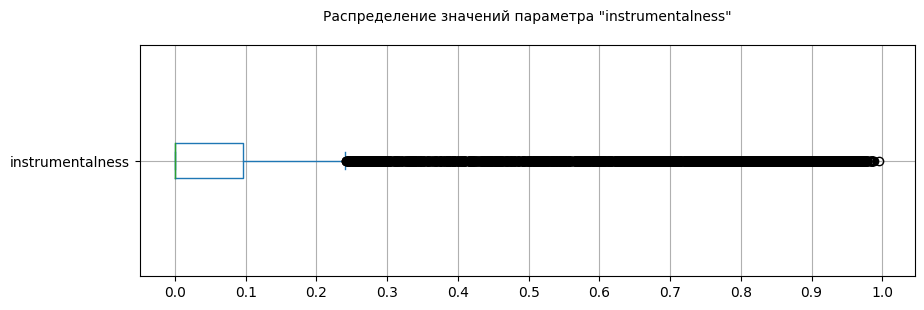

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='instrumentalness',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "instrumentalness"' + "\n", fontsize=10)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

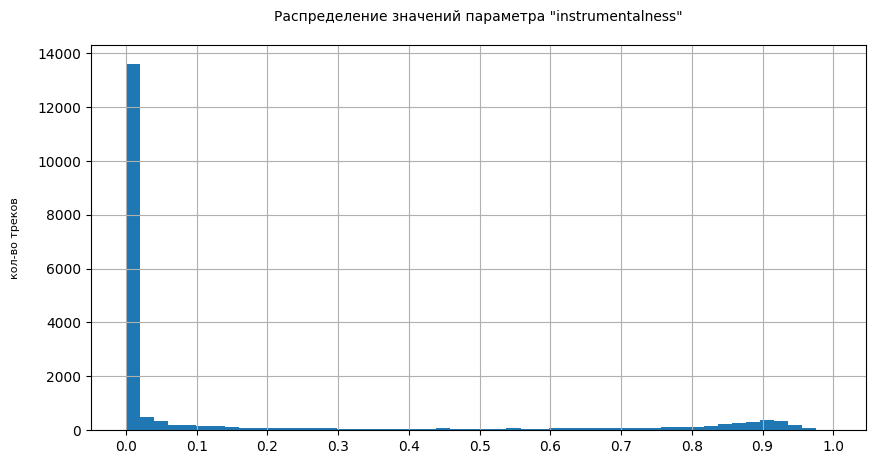

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='instrumentalness',
    bins=50,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "instrumentalness"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.5. liveness
     

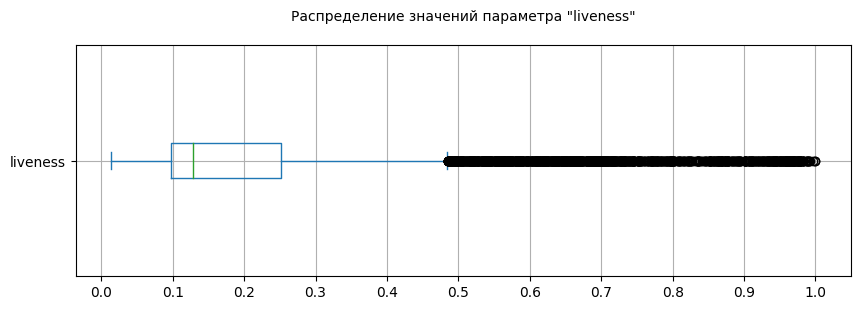

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='liveness',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "liveness"' + "\n", fontsize=10)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

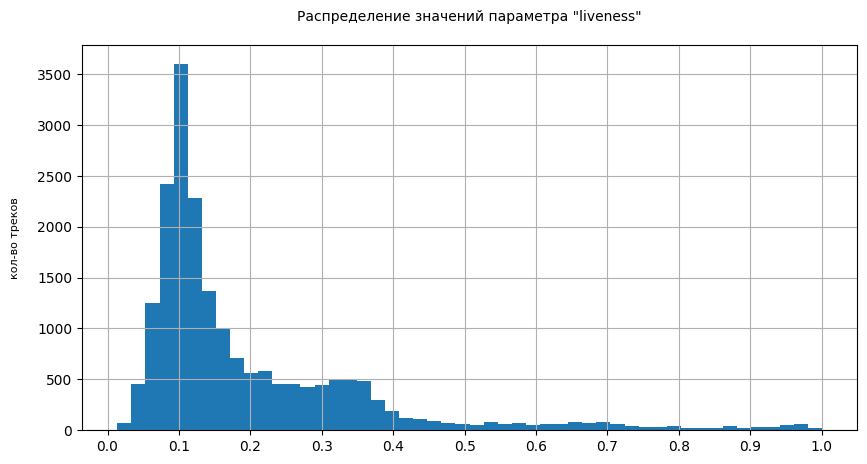

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='liveness',
    bins=50,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "liveness"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.6. loudness

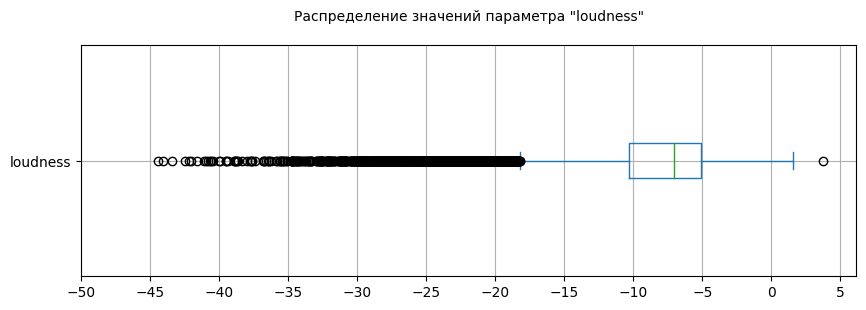

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='loudness',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "loudness"' + "\n", fontsize=10)

ax.set_xticks(np.arange(-50, 10, 5))

plt.show()

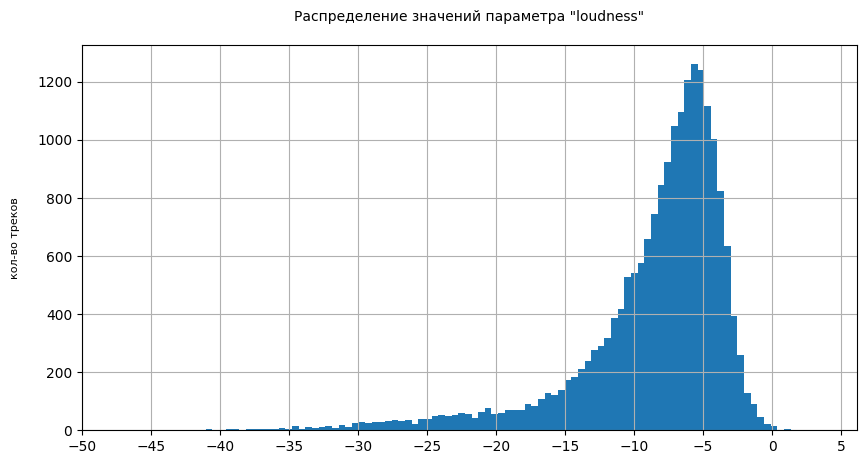

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='loudness',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "loudness"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(-50, 10, 5))

plt.show()

In [ ]:
# найдём процент положительны значений признака в каждом жанре

train.groupby('music_genre')['loudness'].apply(lambda x: (x > 0).mean() * 100).round(2)

music_genre
Alternative    0.00
Anime          0.26
Blues          0.07
Classical      0.00
Country        0.00
Electronic     0.39
Hip-Hop        0.00
Jazz           0.00
Rap            0.00
Rock           0.00
Name: loudness, dtype: float64

##### 1.1.7. speechiness
       
     

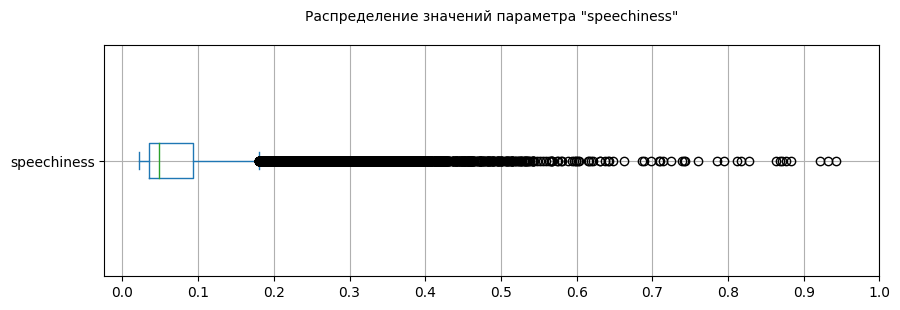

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='speechiness',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "speechiness"' + "\n", fontsize=10)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

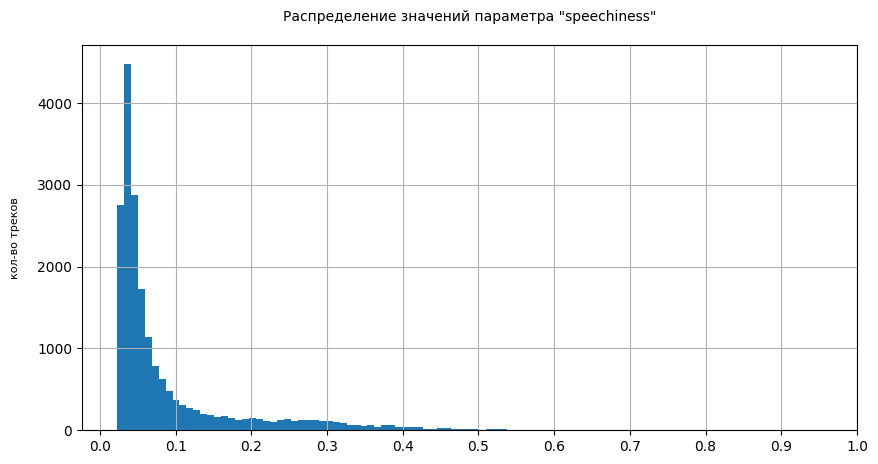

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='speechiness',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "speechiness"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.8. tempo

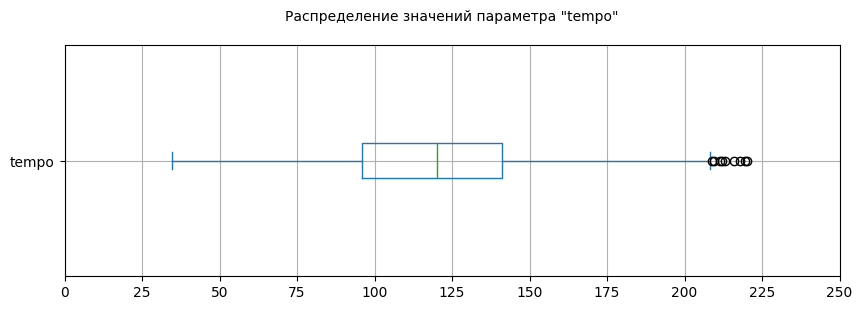

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='tempo',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "tempo"' + "\n", fontsize=10)

ax.set_xticks(np.arange(0, 275, 25))

plt.show()

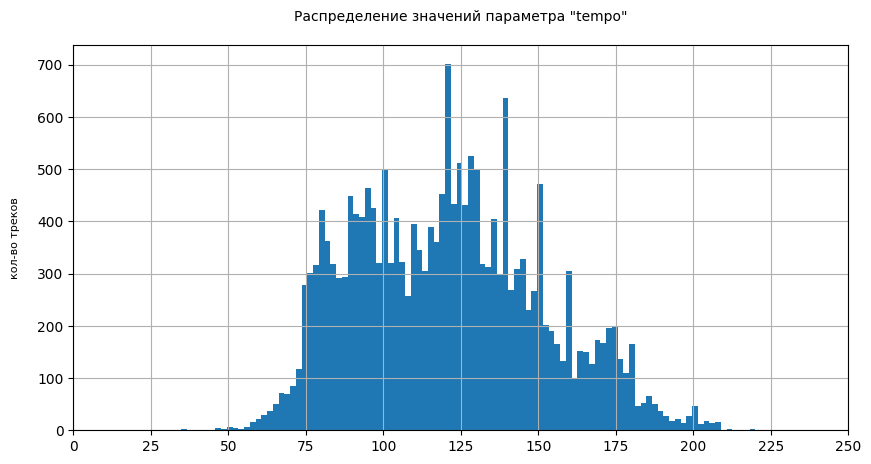

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='tempo',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "tempo"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 275, 25))

plt.show()

##### 1.1.9. valence
       
     

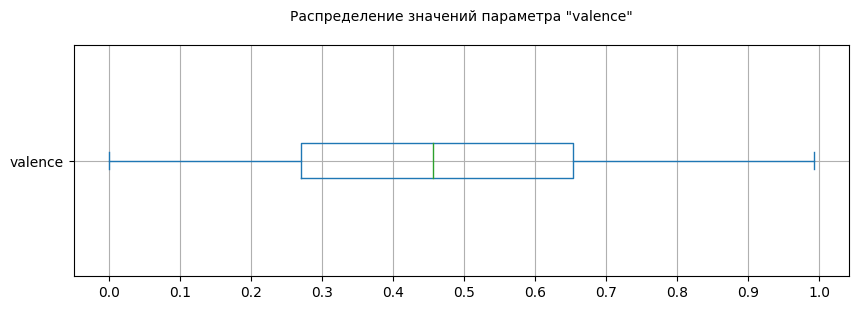

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='valence',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "valence"' + "\n", fontsize=10)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

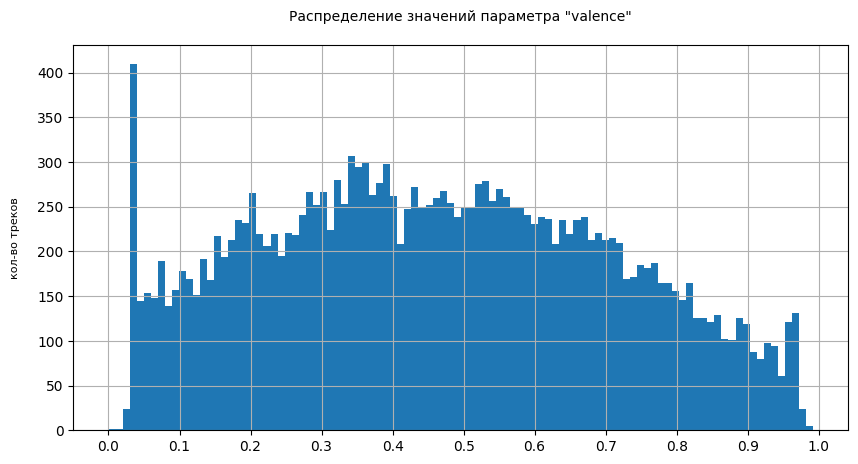

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='valence',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "valence"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

##### 1.1.10. duration_min    

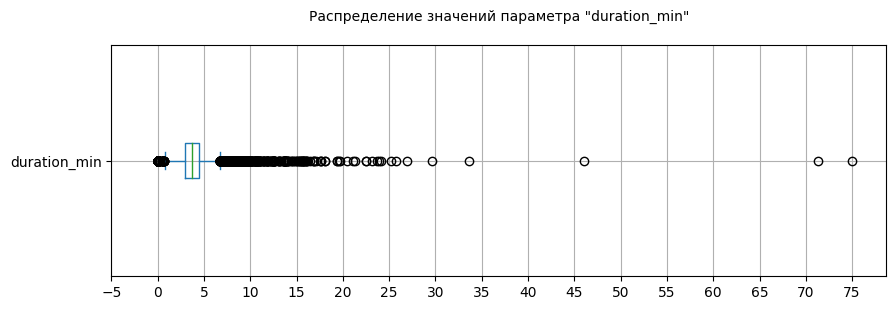

In [ ]:
# построим график

ax = train.plot(
    kind='box',
    y='duration_min',
    vert=False,
    figsize=(10, 3)
)

ax.grid()
ax.set_title('Распределение значений параметра "duration_min"' + "\n", fontsize=10)

ax.set_xticks(np.arange(-5, 80, 5))

plt.show()

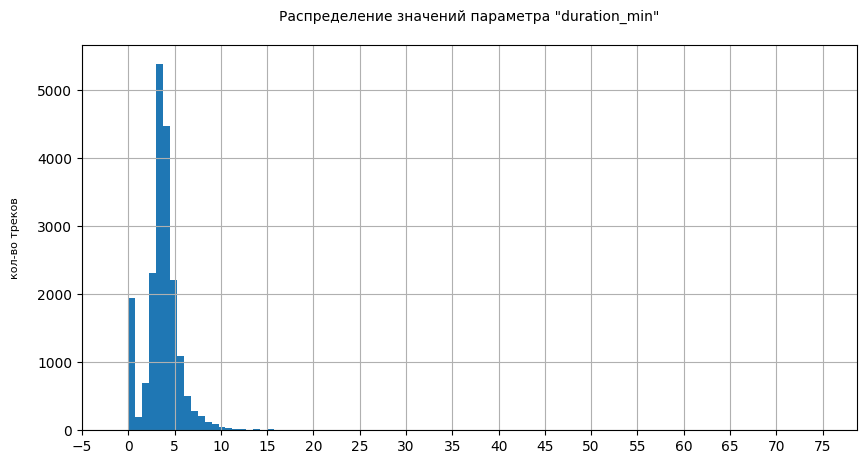

In [ ]:
# построим график

ax = train.plot(
    kind='hist',
    y='duration_min',
    bins=100,
    figsize=(10, 5)
)

ax.grid()
ax.legend_.remove()

ax.set_title('Распределение значений параметра "duration_min"' + "\n", fontsize=10)
ax.set_ylabel('кол-во треков'+ "\n", fontsize=8)

ax.set_xticks(np.arange(-5, 80, 5))

plt.show()

In [ ]:
# найдём процент отрицательных значений признака в каждом жанре

train.groupby('music_genre')['duration_min'].apply(lambda x: (x < 0).mean() * 100).round(2)

music_genre
Alternative    10.11
Anime           9.08
Blues           9.22
Classical      10.07
Country         9.80
Electronic      9.55
Hip-Hop        10.32
Jazz            9.40
Rap            10.36
Rock            9.97
Name: duration_min, dtype: float64

In [34]:
# найдём процент значений > 20 в каждом жанре

train.groupby('music_genre')['duration_min'].apply(lambda x: (x > 20).mean() * 100).round(2)

music_genre
Alternative    0.00
Anime          0.00
Blues          0.11
Classical      0.73
Country        0.00
Electronic     0.12
Hip-Hop        0.00
Jazz           0.08
Rap            0.00
Rock           0.00
Name: duration_min, dtype: float64

In [ ]:
# делаем продолжительность не отрицательной

#train.loc[train['duration_ms'] < 0, 'duration_ms'] = 0

#### 1.2. корреляция

<Axes: >

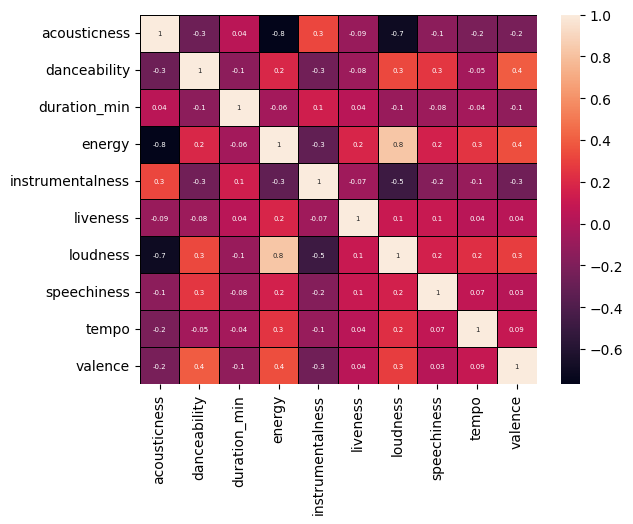

In [35]:
# чисто код для таблицы корреляции опробовать
corr_matrix = train.corr(numeric_only=True)
#sns.heatmap(corr_matrix, annot=True)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', linewidths=0.5, linecolor='black', annot_kws={"size":5})
#plt.show()

<Axes: >

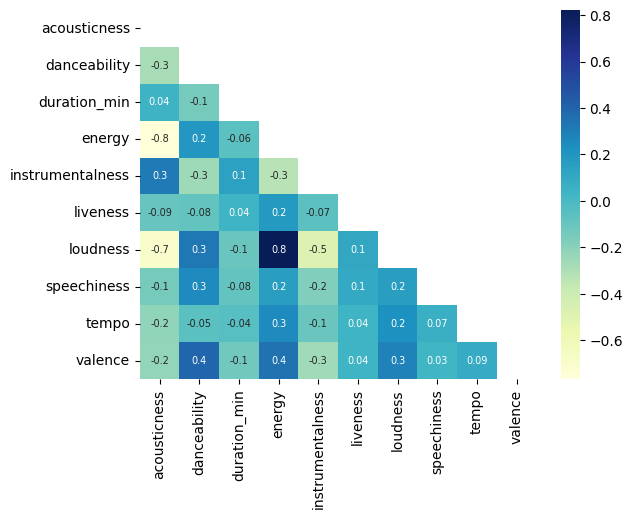

In [36]:
matrix = np.triu(train.corr(numeric_only=True))
sns.heatmap(train.corr(numeric_only=True), annot=True, mask=matrix, fmt='.1g', cmap='YlGnBu', annot_kws={"size":7})

#### 1.3. вывод

### 🛠 2. Категориальные признаки

  'track_name', 'key', 'mode', 'music_genre',

In [37]:
train['music_genre'].value_counts()

music_genre
Blues          2810
Electronic     2544
Alternative    2462
Rap            2278
Country        2072
Rock           2017
Anime          1895
Classical      1370
Jazz           1224
Hip-Hop        1047
Name: count, dtype: int64

<Axes: xlabel='music_genre'>

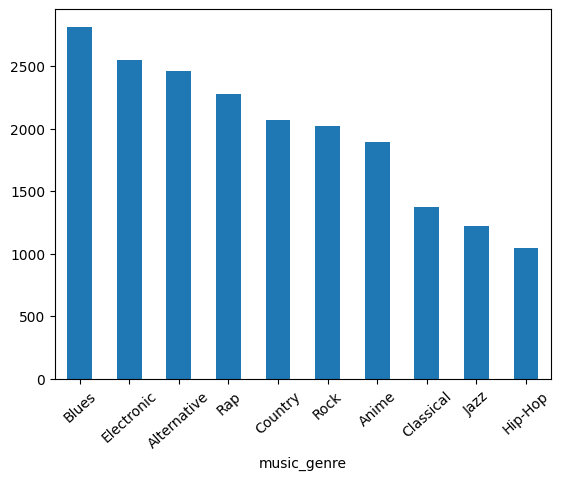

In [ ]:
train["music_genre"].value_counts().plot.bar(rot = 42)

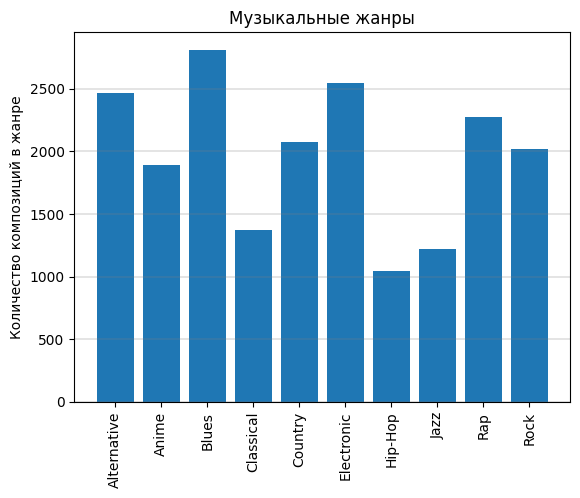

In [ ]:
genres = dict(train.pivot_table(index='music_genre',  aggfunc='count'))
genres = genres['acousticness']
genres = dict(genres)
l = range(len(genres))
plt.rc('grid', linestyle='-', color='gray', linewidth= 0.3 ) #нужно для настройки внешнего вида сетки
plt.bar(l, genres.values())
plt.title('Музыкальные жанры')
plt.ylabel('Количество композиций в жанре')
plt.xticks(l, genres, rotation = 90)
#plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.show()

### 🛠 3. Новые признаки

#### 🛠 3.1 Пераметр LAE

Новый признак расчитывается по формуле: <font color = 'red'>**loudness + acousticness / energy**</font>

In [38]:
genre_means = train.groupby('music_genre').agg({
    'liveness': 'mean',
    'acousticness': 'mean'
}).reset_index()

# Объединяем данные с исходным DataFrame
train = train.merge(genre_means, on='music_genre', suffixes=('', '_mean'))

# Создаем новый признак new_param
train['LAE'] = (train['liveness_mean'] + train['acousticness_mean']) / (train['energy'])

# Удаление временных колонок, если это необходимо
train.drop(columns=['liveness_mean', 'acousticness_mean'], inplace=True)

#### 🛠 3.2 Высокая инструментальность

Новый признак показывает жанры, для которых характерна высокая инструментальностm:

- значение 0,78 отсекает жанр Country;
- значение 0.93 отсекает жанр Hip-Hop и Rap

In [42]:
# Подсчет количества песен по жанрам, где значение instrumentalness > 0.60
count_songs = train[train['instrumentalness'] > 0.60].groupby('music_genre').size()

# Подсчет общего количества песен по жанрам
total_songs = train.groupby('music_genre').size()

# Подсчет процента песен по жанрам, где значение instrumentalness > 0.60
percentage_songs = ((count_songs / total_songs) * 100).round(2)

# Объединение количества и процентов в один DataFrame
result = pd.DataFrame({'count': count_songs, 'percentage': percentage_songs})

# Вывод результата
print(result)

             count  percentage
music_genre                   
Alternative     99        4.02
Anime          544       28.71
Blues          181        6.44
Classical      868       63.36
Country          4        0.19
Electronic     831       32.67
Hip-Hop          9        0.86
Jazz           449       36.68
Rap             11        0.48
Rock            75        3.72


In [43]:
filtered_tracks = train[train['instrumentalness'] >= 0.60]

# Подсчет количества композиций для каждого жанра
genre_counts = filtered_tracks['music_genre'].value_counts().reset_index()
genre_counts.columns = ['music_genre', 'count']

# Вывод результата
print(genre_counts)

   music_genre  count
0    Classical    869
1   Electronic    832
2        Anime    544
3         Jazz    449
4        Blues    182
5  Alternative    100
6         Rock     75
7          Rap     11
8      Hip-Hop      9
9      Country      4


In [44]:
train['high_instr'] = train['instrumentalness'].apply(lambda x: x if x >= 0.60 else 0)

In [ ]:
# train.drop('instrumentalness_new', axis = 1, inplace = True)

#### 🛠 3.3 Не латинские символы

In [ ]:
# train.drop("no_eng", axis = 1, inplace = True)

In [45]:
def has_non_latin_characters(track_name):
    return int(bool(re.search(r'[^\x00-\x7F]', track_name)))

# Применение функции ко всем значениям столбца track_name
train['non_latin'] = train['track_name'].apply(has_non_latin_characters)

# Вывод результата

In [ ]:
train.sample(15)

,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,LAE,high_instr,non_latin
7837,Don't Be Angry,0.818000,0.368,-0.000017,0.5470,0.000057,C,0.1870,-8.551,Major,0.0428,164.055,0.9360,Blues,1.007183,0.000,0
318,Wink - Remastered Version,0.129000,0.705,2.710667,0.8880,0.000015,E,0.2060,-5.232,Major,0.0301,117.595,0.9340,Country,0.517692,0.000,0
18830,"Piano Concerto in A Minor, Op.16: II. Adagio",0.982000,0.161,6.788217,0.0247,0.933000,C#,0.0829,-25.167,Major,0.0384,92.975,0.0352,Classical,42.345552,0.933,0
4160,"When They Fight, They Fight",0.242000,0.755,3.336883,0.8980,0.000145,B,0.1440,-2.051,Minor,0.0323,119.756,0.9660,Alternative,0.406090,0.000,0
7984,Street Joy,0.077600,0.623,3.606667,0.5350,0.006800,B,0.1570,-8.689,Minor,0.0321,126.906,0.4380,Blues,1.029774,0.000,0
4660,Caught In A Mosh,0.000390,0.361,5.001550,0.9910,0.002120,D,0.2760,-4.975,Major,0.1360,106.578,0.2280,Alternative,0.367980,0.000,0
10155,Copperhead Kiss,0.000061,0.250,4.012667,0.9430,0.000020,G,0.0577,-4.032,Major,0.1040,89.200,0.2810,Blues,0.584230,0.000,0
10670,Making Plans For Nigel,0.359000,0.735,3.539783,0.4060,0.007100,A,0.1180,-12.390,Major,0.0333,119.984,0.5910,Jazz,1.663911,0.000,0
9056,Roll On Down The Highway,0.002760,0.475,3.996667,0.8010,0.018300,G,0.3050,-11.939,Major,0.0292,138.979,0.8730,Blues,0.687802,0.000,0
14207,恋文~ラブレター~,0.301000,0.516,4.181783,0.5970,0.000000,A,0.2180,-4.179,Major,0.0335,167.888,0.4290,Anime,0.776420,0.000,1


In [46]:
train['latin'] = 1 - train['non_latin']
pivot_table = pd.pivot_table(train, index='music_genre', values=['latin', 'non_latin'], aggfunc='sum', fill_value=0)
# Переименование столбцов для удобства
pivot_table.columns = ['latin', 'non_latin']

# Вывод результата
print(pivot_table)

             latin  non_latin
music_genre                  
Alternative   2422         40
Anime         1445        450
Blues         2789         21
Classical     1164        206
Country       2060         12
Electronic    2516         28
Hip-Hop       1030         17
Jazz          1200         24
Rap           2265         13
Rock          1992         25


In [47]:
# посмотрим какой процент внутри каждого из жанров составляют композиции с нелатинскими символами

genre_counts = train.groupby('music_genre').size()
non_latin_counts = train.groupby('music_genre')['non_latin'].sum()
percent_non_latin = ((non_latin_counts / genre_counts) * 100).round(1)

print(percent_non_latin)

music_genre
Alternative     1.6
Anime          23.7
Blues           0.7
Classical      15.0
Country         0.6
Electronic      1.1
Hip-Hop         1.6
Jazz            2.0
Rap             0.6
Rock            1.2
dtype: float64


### 🛠 4. Замена категорийных

In [48]:
train.sample(3)

,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,LAE,high_instr,non_latin,latin
6716,Same Difference,0.20600,0.471,4.90800,0.766,0.000002,C,0.105,-7.774,Minor,0.423,170.863,0.376,Hip-Hop,0.495388,0.0,0,1
7908,Imuhar,0.00338,0.522,3.81555,0.892,0.004610,B,0.279,-6.961,Minor,0.037,86.763,0.898,Blues,0.617633,0.0,0,1
11550,Future Crypto,0.16600,0.637,3.43530,0.472,0.105000,B,0.143,-4.984,Minor,0.108,84.599,0.220,Jazz,1.431245,0.0,0,1


Сейчас в датасетей несколько признаком являются категорийными: track_name, key и mode.

Избавимся от категорийных признаков **key** и **mode** при помощи get_dummies:

In [49]:
train = pd.get_dummies(train, columns = ['key', 'mode'], dtype = int)

In [50]:
train.sample(3)

,track_name,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
579,Blaze of Somethin',0.0309,0.536,3.493000,0.825,0.000000,0.110,-4.724,0.0623,99.940,...,0,0,0,0,0,1,0,0,1,0
15633,煌めく浜辺,0.5470,0.543,4.190883,0.694,0.047600,0.188,-4.873,0.0286,138.042,...,0,0,0,0,1,0,0,0,1,0
4776,Saint Simon,0.1150,0.617,-0.000017,0.536,0.000002,0.108,-6.258,0.0232,92.720,...,0,0,1,0,0,0,0,0,1,0


## Часть III: Машинное обучение

### 🛠 Установка констант и переменных

In [51]:
random_state = 42
test_size = 0.25

In [52]:
train.drop('track_name', axis = 1, inplace = True)

In [53]:
train.sample(1)

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
9416,0.026,0.607,5.43355,0.784,0.00124,0.16,-6.035,0.0269,111.871,0.643,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
(train.isna().mean().sort_values(ascending=False) * 100).round(2)

In [54]:
train.drop('instrumentalness', axis = 1, inplace = True)

In [55]:
train.drop('energy', axis = 1, inplace = True)

In [56]:
train.drop('acousticness', axis = 1, inplace = True)

### 🛠 CatBoost

In [ ]:
# train.drop('music_genre_encoded', axis = 1, inplace = True)

In [57]:
X = train.drop(['music_genre', 'latin'], axis=1)
y = train['music_genre']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = test_size,
    random_state = random_state
    )

In [ ]:
X_train.dtypes

In [60]:
X_train.iloc[:, [5, 8]] = X_train.iloc[:, [5, 8]].astype(str)

# CB_model = CatBoostClassifier(cat_features=[5, 8])
# CB_model.fit(X_train, y_train)

In [61]:
CB_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=4,
    random_strength=0.1,
    bagging_temperature=0.2,
    border_count=32,
    early_stopping_rounds=10,
    cat_features=['key_A', 'key_A#', 'key_B',
                  'key_C', 'key_C#', 'key_D', 'key_D#',
                  'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
                  'mode_Major', 'mode_Minor'],
    eval_metric='Accuracy',
    verbose=100
)

# Обучение модели
CB_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.4012442	test: 0.4210953	best: 0.4210953 (0)	total: 81.5ms	remaining: 40.7s
100:	learn: 0.6172831	test: 0.5890467	best: 0.5890467 (100)	total: 3.48s	remaining: 13.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.5890466531
bestIteration = 100

Shrink model to first 101 iterations.


In [62]:
preds = CB_model.predict(X_test)

In [63]:
f1_score(y_test, preds, average='micro')

0.5890466531440163

In [64]:
print(f"Важность признаков в CatB: {sorted(zip(X_train.columns, CB_model.feature_importances_), key=lambda x: -x[1])}")

Важность признаков в CatB: [('LAE', 41.54338348823149), ('danceability', 13.268340300758377), ('speechiness', 12.856216788154276), ('valence', 8.366425652857155), ('loudness', 7.592077119418372), ('high_instr', 5.917979619897016), ('duration_min', 3.6165457928530738), ('non_latin', 1.7047623454776728), ('tempo', 1.5081023510512828), ('mode_Major', 1.3292967261927615), ('liveness', 0.8326969437200881), ('key_C#', 0.5172541626798409), ('key_G', 0.3194950446147795), ('mode_Minor', 0.30066770660639824), ('key_D', 0.26485359468272773), ('key_A#', 0.06190236280469119), ('key_A', 0.0), ('key_B', 0.0), ('key_C', 0.0), ('key_D#', 0.0), ('key_E', 0.0), ('key_F', 0.0), ('key_F#', 0.0), ('key_G#', 0.0)]


In [65]:
params = CB_model.get_params()

# Вывод параметров модели
print("Параметры модели CatBoost:")
for param, value in params.items():
    print(f"{param}: {value}")

Параметры модели CatBoost:
iterations: 500
learning_rate: 0.1
depth: 6
l2_leaf_reg: 4
border_count: 32
verbose: 100
random_strength: 0.1
eval_metric: Accuracy
bagging_temperature: 0.2
early_stopping_rounds: 10
cat_features: ['key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']


#### ▶ GridSearchCV CB

Попробуем поискать лучшие признаки для модели.

In [ ]:
param_grid_cb = {
    'iterations': [200, 300],
    'depth': [2, 3, 5],
    'learning_rate': [0.2, 0.3, 0.4],
    'l2_leaf_reg': [5, 7, 9]
}

# Модель
cb = CatBoostClassifier(random_state=42, silent=True)

# GridSearchCV
grid_search_cb = GridSearchCV(estimator=cb, param_grid=param_grid_cb,
                              cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Обучение
grid_search_cb.fit(X_train, y_train)

# Лучшие параметры и оценка
print("Лучшие параметры для CatBoost:")
print(grid_search_cb.best_params_)
print("Лучший f1_score для CatBoost:")
print(grid_search_cb.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Лучшие параметры для CatBoost:
{'depth': 5, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
Лучший f1_score для CatBoost:
0.5808794044731184


### 🛠 LGBMClassifier

In [66]:
X = train.drop(['music_genre', 'latin'], axis=1)
y = train['music_genre']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = test_size,
    random_state = random_state
    )

In [68]:
LGB_model = lgb.LGBMClassifier(verbose=0)
LGB_model.fit(X_train, y_train)

LGBMClassifier(verbose=0)

In [69]:
preds = LGB_model.predict(X_test)

In [70]:
f1_score(y_test, preds, average='micro')

0.593103448275862

In [71]:
print(f"Важность признаков в LGBM: {sorted(zip(X_train.columns, LGB_model.feature_importances_), key=lambda x: -x[1])}")

Важность признаков в LGBM: [('LAE', 4367), ('danceability', 3725), ('speechiness', 3449), ('valence', 3442), ('loudness', 3334), ('tempo', 3274), ('liveness', 2827), ('duration_min', 2751), ('high_instr', 872), ('mode_Major', 262), ('non_latin', 184), ('key_C#', 180), ('key_D', 160), ('key_G', 141), ('key_F', 128), ('key_A', 123), ('key_C', 116), ('key_F#', 110), ('key_G#', 109), ('key_E', 108), ('key_A#', 107), ('key_B', 100), ('key_D#', 73), ('mode_Minor', 58)]


In [72]:
LGBM_cols = X_train.columns[LGB_model.feature_importances_ > 1]
CB_cols = X_train.columns[CB_model.feature_importances_ > 2]

selected_features = list(set(LGBM_cols) & set(CB_cols))
print(selected_features)

['loudness', 'valence', 'danceability', 'duration_min', 'LAE', 'high_instr', 'speechiness']


In [73]:
params = LGB_model.get_params()

# Вывод параметров модели
print("Параметры модели CatBoost:")
for param, value in params.items():
    print(f"{param}: {value}")

Параметры модели CatBoost:
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.1
max_depth: -1
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 100
n_jobs: None
num_leaves: 31
objective: None
random_state: None
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0
verbose: 0


#### ▶ GridSearchCV LGBM_B

In [ ]:
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Модель
lgbm = LGBMClassifier(random_state=42)

# GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm,
                                cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Обучение
grid_search_lgbm.fit(X_train, y_train)

# Лучшие параметры и оценка
print("Лучшие параметры для LGBM:")
print(grid_search_lgbm.best_params_)
print("Лучший f1_score для LGBM:")
print(grid_search_lgbm.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 14789, number of used features: 24
[LightGBM] [Info] Start training from score -2.083575
[LightGBM] [Info] Start training from score -2.338309
[LightGBM] [Info] Start training from score -1.953853
[LightGBM] [Info] Start training from score -2.664325
[LightGBM] [Info] Start training from score -2.234562
[LightGBM] [Info] Start training from score -2.056778
[LightGBM] [Info] Start training from score -2.914530
[LightGBM] [Info] Start training from score -2.774010
[LightGBM] [Info] Start training from score -2.164433
[LightGBM] [Info] Start training from score -2.289753
Лучшие параметры для LGBM:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves':

### 🛠 Random Forest

In [74]:
X = train.drop(['music_genre', 'latin'], axis=1)
y = train['music_genre']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = test_size, random_state = random_state)

In [76]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = RF_model.predict(X_test)

In [78]:
f1_score(y_test, preds, average='micro')

0.593103448275862

In [79]:
print(f"Важность признаков в RF_model: {sorted(zip(X_train.columns, RF_model.feature_importances_), key=lambda x: -x[1])}")

Важность признаков в RF_model: [('LAE', 0.19608093150725067), ('loudness', 0.11091678812918099), ('danceability', 0.10896759955551415), ('speechiness', 0.10835005650657667), ('valence', 0.094489370682958), ('duration_min', 0.0823108987097646), ('tempo', 0.07801287389719648), ('liveness', 0.07419381240177209), ('high_instr', 0.03188654610676936), ('non_latin', 0.013507865568801094), ('key_G', 0.00881506661483575), ('key_C', 0.008491407903516603), ('key_A', 0.008273483054672943), ('key_D', 0.008207079595797686), ('key_C#', 0.00820504369285408), ('mode_Minor', 0.007851496232914677), ('mode_Major', 0.007760152908587841), ('key_F', 0.0076967073818917705), ('key_B', 0.0069833300596086915), ('key_E', 0.006937386123514938), ('key_G#', 0.0063345700125521254), ('key_F#', 0.006035407370424865), ('key_A#', 0.005837565966490623), ('key_D#', 0.003854560016553288)]


In [80]:
params = RF_model.get_params()

# Вывод параметров модели
print("Параметры модели Random Forest:")
for param, value in params.items():
    print(f"{param}: {value}")

Параметры модели Random Forest:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


#### ▶ GridSearchCV RF

In [96]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [1, 3, 7],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

# Модель
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Обучение
grid_search_rf.fit(X_train, y_train)

# Лучшие параметры и оценка
print("Лучшие параметры для Random Forest:")
print(grid_search_rf.best_params_)
print("Лучший f1_score для Random Forest:")
print(grid_search_rf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры для Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 150}
Лучший f1_score для Random Forest:
0.5476529503354342


### 🛠 XGBoost

In [81]:
# Преобразование меток классов в числовой формат
label_encoder = LabelEncoder()
train['music_genre_encoded'] = label_encoder.fit_transform(train['music_genre'])

In [82]:
train.drop('music_genre_encoded', axis = 1, inplace = True)

In [83]:
X = train.drop(['music_genre', 'latin'], axis=1)
y = train['music_genre']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = test_size,
    random_state = random_state
    )

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [86]:
XGB_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
y_pred = XGB_model.predict(X_test)

In [88]:
f1_score(y_test, preds, average='micro')

0.593103448275862

In [89]:
print(f"Важность признаков в XGB_model: {sorted(zip(X_train.columns, XGB_model.feature_importances_), key=lambda x: -x[1])}")

Важность признаков в XGB_model: [('non_latin', 0.20485947), ('LAE', 0.13484183), ('high_instr', 0.08804214), ('speechiness', 0.057801336), ('mode_Major', 0.057195846), ('danceability', 0.04681634), ('loudness', 0.04030598), ('valence', 0.040039208), ('duration_min', 0.029562365), ('key_C#', 0.02763161), ('key_D#', 0.025988128), ('tempo', 0.02488262), ('key_G#', 0.022894213), ('key_G', 0.022699839), ('key_D', 0.022094201), ('liveness', 0.021777447), ('key_F', 0.020997746), ('key_A#', 0.020466998), ('key_F#', 0.01961897), ('key_C', 0.018680835), ('key_E', 0.01849539), ('key_A', 0.017884457), ('key_B', 0.016422996), ('mode_Minor', 0.0)]


In [90]:
params = XGB_model.get_params()

# Вывод параметров модели
print("Параметры модели XGBoost:")
for param, value in params.items():
    print(f"{param}: {value}")

Параметры модели XGBoost:
objective: multi:softprob
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: mlogloss
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: 42
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None
use_label_encoder: False


#### GridSearchCV XGB

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Модель
xgb = XGBClassifier(random_state=42, use_label_encoder=False)

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Обучение
grid_search_xgb.fit(X_train, y_train)

# Лучшие параметры и оценка
print("Лучшие параметры для XGBoost:")
print(grid_search_xgb.best_params_)
print("Лучший f1_score для XGBoost:")
print(grid_search_xgb.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Лучшие параметры для XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Лучший f1_score для XGBoost:
0.5770766753833237


### 🛠 ВЫВОДЫ:

При подборе оптимальных параметров для моделей получили следующиее показатели **f1_score**:

*   <font color = 'red'>**0.5890**</font>466531440163 - для CatBoost
*   <font color = 'red'>**0.5931**</font>03448275862 - для LGBMClassifier
*   <font color = 'red'>**0.5931**</font>03448275862 - для Random Forest
*   <font color = 'red'>**0.5931**</font>03448275862 - для XGBoost



## ЧАСТЬ IV: Pipeline

In [91]:
X = train.drop(['music_genre', 'latin'], axis=1)
y = train['music_genre']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = test_size,
    random_state = random_state
    )

In [93]:
CB_model = CatBoostClassifier(random_state = random_state, silent=True)
LGB_model = LGBMClassifier(force_row_wise= True, random_state = random_state)
RF_model = RandomForestClassifier(n_estimators=100, random_state = random_state)
XGB_model = XGBClassifier(random_state = random_state, use_label_encoder=False, eval_metric='mlogloss')


# Создание VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', XGB_model),
    ('cb', CB_model),
    ('lgbm', LGB_model)
], voting='soft')

# Создание пайплайна
pipeline = Pipeline([
    ('voting_clf', voting_clf)
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = pipeline.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 14789, number of used features: 24
[LightGBM] [Info] Start training from score -2.083575
[LightGBM] [Info] Start training from score -2.338309
[LightGBM] [Info] Start training from score -1.953853
[LightGBM] [Info] Start training from score -2.664325
[LightGBM] [Info] Start training from score -2.234562
[LightGBM] [Info] Start training from score -2.056778
[LightGBM] [Info] Start training from score -2.914530
[LightGBM] [Info] Start training from score -2.774010
[LightGBM] [Info] Start training from score -2.164433
[LightGBM] [Info] Start training from score -2.289753
Accuracy: 0.6046653144016227
F1-Score: 0.5954091521627362
              precision    recall  f1-score   support

 Alternative       0.51      0.48      0.50       621
       Anime       0.69      0.70      0.70       468
       Blues       0.62      0.72      0.67       714
   Classical       0.85      0.93      0.89       340
    

In [99]:
CB_model = cb.CatBoostClassifier(verbose=0)
LGB_model = lgb.LGBMClassifier(verbose=0)

CB_model.fit(X_train, y_train)
LGB_model.fit(X_train, y_train)

LGBMClassifier(verbose=0)

TEST
              precision    recall  f1-score   support

 Alternative       0.51      0.48      0.49       621
       Anime       0.68      0.71      0.69       468
       Blues       0.60      0.70      0.65       714
   Classical       0.86      0.91      0.89       340
     Country       0.56      0.59      0.57       489
  Electronic       0.77      0.73      0.75       653
     Hip-Hop       0.29      0.17      0.21       245
        Jazz       0.60      0.52      0.56       301
         Rap       0.47      0.59      0.52       580
        Rock       0.45      0.35      0.40       519

    accuracy                           0.59      4930
   macro avg       0.58      0.57      0.57      4930
weighted avg       0.59      0.59      0.59      4930

TRAIN
              precision    recall  f1-score   support

 Alternative       0.90      0.80      0.85      1841
       Anime       0.97      0.93      0.95      1427
       Blues       0.89      0.96      0.92      2096
   Classical 

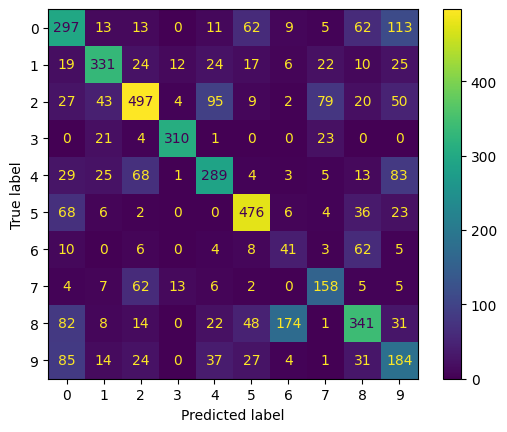

In [100]:
# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test, LGB_model.predict(X_test)))
print("TRAIN")
print(classification_report(y_train, LGB_model.predict(X_train)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
cm = confusion_matrix(LGB_model.predict(X_test), y_test)
disp = plot_confusion_matrix(cm)
disp.plot()
plt.show()

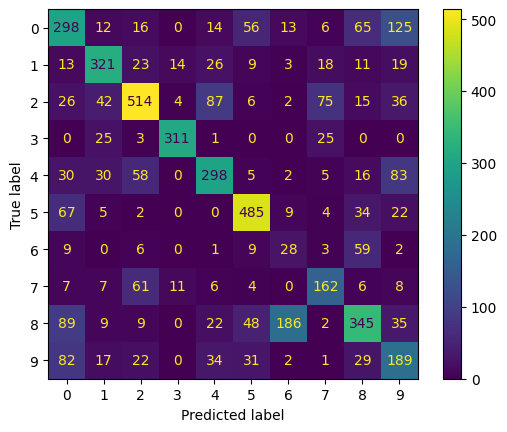

In [101]:
cm = confusion_matrix(CB_model.predict(X_test), y_test)
disp = plot_confusion_matrix(cm)
disp.plot()
plt.show()